In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: unzip the file stored in this location /content/f1(1950-2024).zip and save to same directory

!unzip datset.zip -d .


Archive:  /content/f1(1950-2024).zip
  inflating: /content/circuits.csv   
  inflating: /content/constructor_results.csv  
  inflating: /content/constructor_standings.csv  
  inflating: /content/constructors.csv  
  inflating: /content/driver_standings.csv  
  inflating: /content/drivers.csv    
  inflating: /content/lap_times.csv  
  inflating: /content/pit_stops.csv  
  inflating: /content/qualifying.csv  
  inflating: /content/races.csv      
  inflating: /content/results.csv    
  inflating: /content/seasons.csv    
  inflating: /content/sprint_results.csv  
  inflating: /content/status.csv     


In [ ]:
circuits = pd.read_csv('circuits.csv')
circuits = circuits[['circuitId', 'circuitRef', 'name']]
circuits.head()

,circuitId,circuitRef,name
0,1,albert_park,Albert Park Grand Prix Circuit
1,2,sepang,Sepang International Circuit
2,3,bahrain,Bahrain International Circuit
3,4,catalunya,Circuit de Barcelona-Catalunya
4,5,istanbul,Istanbul Park


In [ ]:
circuits.isna().sum()

,0
circuitId,0
circuitRef,0
name,0


In [ ]:
drivers = pd.read_csv('drivers.csv')
drivers['driver_name'] = drivers['forename'] + ' ' + drivers['surname']
drivers.drop(['forename', 'surname', 'url', 'code', 'dob', 'nationality', 'number'], axis=1, inplace=True)
drivers.head()

,driverId,driverRef,driver_name
0,1,hamilton,Lewis Hamilton
1,2,heidfeld,Nick Heidfeld
2,3,rosberg,Nico Rosberg
3,4,alonso,Fernando Alonso
4,5,kovalainen,Heikki Kovalainen


In [ ]:
drivers.isna().sum()

,0
driverId,0
driverRef,0
driver_name,0


In [ ]:
drivers.shape

(861, 3)

In [ ]:
qualifing = pd.read_csv('qualifying.csv')

# Considering data after 2013
qualifing = qualifing[qualifing['raceId'] >= 900].reset_index(drop=True)
qualifing

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,5860,900,1,131,44,1,1:31.699,1:42.890,1:44.231
1,5861,900,817,9,3,2,1:30.775,1:42.295,1:44.548
2,5862,900,3,131,6,3,1:32.564,1:42.264,1:44.595
3,5863,900,825,1,20,4,1:30.949,1:43.247,1:45.745
4,5864,900,4,6,14,5,1:31.388,1:42.805,1:45.819
...,...,...,...,...,...,...,...,...,...
4605,10547,1144,848,3,23,16,1:23.821,\N,\N
4606,10548,1144,855,15,24,17,1:23.880,\N,\N
4607,10549,1144,1,131,44,18,1:23.887,\N,\N
4608,10550,1144,861,3,43,19,1:23.912,\N,\N


In [ ]:
qualifing.isna().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,0
q2,22
q3,46


In [ ]:
qualifing.shape

(4610, 9)

In [ ]:
qualifing[qualifing['q1'] == '\\N']

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
21,5881,900,813,208,13,22,\N,\N,\N
87,5971,903,813,208,13,22,\N,\N,\N
109,5993,904,813,208,13,22,\N,\N,\N
153,6037,906,821,15,21,22,\N,\N,\N
219,6103,909,828,207,9,22,\N,\N,\N
240,6124,910,1,131,44,21,\N,\N,\N
241,6125,910,813,208,13,22,\N,\N,\N
639,6543,938,830,5,33,20,\N,\N,\N
738,6642,943,18,1,22,20,\N,\N,\N
758,6662,944,4,1,14,20,\N,\N,\N


**Replacing invalid strings with NaN**

In [ ]:
qualifing.replace('\\N', np.nan, inplace=True)

In [ ]:
qualifing.isna().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,51
q2,1222
q3,2397


In [ ]:
qualifing[qualifing['q1'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
21,5881,900,813,208,13,22,NaN,NaN,NaN
87,5971,903,813,208,13,22,NaN,NaN,NaN
109,5993,904,813,208,13,22,NaN,NaN,NaN
153,6037,906,821,15,21,22,NaN,NaN,NaN
219,6103,909,828,207,9,22,NaN,NaN,NaN
240,6124,910,1,131,44,21,NaN,NaN,NaN
241,6125,910,813,208,13,22,NaN,NaN,NaN
639,6543,938,830,5,33,20,NaN,NaN,NaN
738,6642,943,18,1,22,20,NaN,NaN,NaN
758,6662,944,4,1,14,20,NaN,NaN,NaN


In [ ]:
qualifing[qualifing['q2'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
16,5876,900,820,206,4,17,1:34.293,NaN,NaN
17,5877,900,824,206,17,18,1:34.794,NaN,NaN
18,5878,900,821,15,21,19,1:35.117,NaN,NaN
19,5879,900,828,207,9,20,1:35.157,NaN,NaN
20,5880,900,154,208,8,21,1:36.993,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4605,10547,1144,848,3,23,16,1:23.821,NaN,NaN
4606,10548,1144,855,15,24,17,1:23.880,NaN,NaN
4607,10549,1144,1,131,44,18,1:23.887,NaN,NaN
4608,10550,1144,861,3,43,19,1:23.912,NaN,NaN


In [ ]:
qualifing[qualifing['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
10,5870,900,18,1,22,11,1:31.396,1:44.437,NaN
11,5871,900,8,6,7,12,1:32.439,1:44.494,NaN
12,5872,900,20,9,1,13,1:31.931,1:44.688,NaN
13,5873,900,16,15,99,14,1:33.673,1:45.655,NaN
14,5874,900,155,207,10,15,1:34.274,1:45.867,NaN
...,...,...,...,...,...,...,...,...,...
4605,10547,1144,848,3,23,16,1:23.821,NaN,NaN
4606,10548,1144,855,15,24,17,1:23.880,NaN,NaN
4607,10549,1144,1,131,44,18,1:23.887,NaN,NaN
4608,10550,1144,861,3,43,19,1:23.912,NaN,NaN


In [ ]:
qualifing['q1'] = qualifing['q1'].fillna('00:00')
qualifing[qualifing['q1'] == '00:00']

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
21,5881,900,813,208,13,22,00:00,NaN,NaN
87,5971,903,813,208,13,22,00:00,NaN,NaN
109,5993,904,813,208,13,22,00:00,NaN,NaN
153,6037,906,821,15,21,22,00:00,NaN,NaN
219,6103,909,828,207,9,22,00:00,NaN,NaN
240,6124,910,1,131,44,21,00:00,NaN,NaN
241,6125,910,813,208,13,22,00:00,NaN,NaN
639,6543,938,830,5,33,20,00:00,NaN,NaN
738,6642,943,18,1,22,20,00:00,NaN,NaN
758,6662,944,4,1,14,20,00:00,NaN,NaN


In [ ]:
qualifing['q2'] = qualifing['q2'].fillna(qualifing['q1'])
qualifing[qualifing['q2'] == '00:00']

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
21,5881,900,813,208,13,22,00:00,00:00,NaN
87,5971,903,813,208,13,22,00:00,00:00,NaN
109,5993,904,813,208,13,22,00:00,00:00,NaN
153,6037,906,821,15,21,22,00:00,00:00,NaN
219,6103,909,828,207,9,22,00:00,00:00,NaN
240,6124,910,1,131,44,21,00:00,00:00,NaN
241,6125,910,813,208,13,22,00:00,00:00,NaN
639,6543,938,830,5,33,20,00:00,00:00,NaN
738,6642,943,18,1,22,20,00:00,00:00,NaN
758,6662,944,4,1,14,20,00:00,00:00,NaN


In [ ]:
qualifing['q3'] = qualifing['q3'].fillna(qualifing['q2'])
qualifing.isna().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,0
q2,0
q3,0


**Utility functions to convert lap times into milliseconds**

In [ ]:
import re

def is_numeric_regex(s):
    integer_pattern = r'^[-+]?[0-9]+$'
    float_pattern = r'^[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?$'
    return re.match(integer_pattern, s) or re.match(float_pattern, s)

# Check if the string is numeric before attempting to format it
def format_time_util(h, m, s):
  if is_numeric_regex(h) == None:
    h = '00'
  if is_numeric_regex(m) == None:
    m = '00'
  if is_numeric_regex(s) == None:
    s = '00'
  return h + ':' + m + ':' + s


def format_time(time_str):
  hms = time_str.split(':')
  if len(hms) == 3:
    h, m, s = hms[0], hms[1], hms[2]
  elif len(hms) == 2:
    h, m, s = '00', hms[0], hms[1]
  elif len(hms) == 1:
    h, m, s = '00', '00', hms[0]
  else:
    return None
  time_str = format_time_util(h, m, s)
  return time_str


def convert_to_milliseconds(time_str):
  # Return NaN for any un-formattable times such as na
  if time_str is None:
      return np.nan
  h, m, s = time_str.split(':')
  milliseconds = int(h) * 3600000 + int(m) * 60000 + int(float(s) * 1000)
  return milliseconds

In [ ]:
# Only apply format_time and convert_to_milliseconds to the 'q1', 'q2', and 'q3' columns
qualifing[['q1', 'q2', 'q3']] = qualifing[['q1', 'q2', 'q3']].applymap(format_time)
qualifing[['q1', 'q2', 'q3']] = qualifing[['q1', 'q2', 'q3']].applymap(convert_to_milliseconds)
qualifing.head()

<ipython-input-21-f3b717a40dc9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qualifing[['q1', 'q2', 'q3']] = qualifing[['q1', 'q2', 'q3']].applymap(format_time)
<ipython-input-21-f3b717a40dc9>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qualifing[['q1', 'q2', 'q3']] = qualifing[['q1', 'q2', 'q3']].applymap(convert_to_milliseconds)


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,5860,900,1,131,44,1,91699,102890,104231
1,5861,900,817,9,3,2,90775,102295,104548
2,5862,900,3,131,6,3,92564,102264,104595
3,5863,900,825,1,20,4,90949,103247,105745
4,5864,900,4,6,14,5,91388,102805,105819


**Creating minimum qualifying time column and droping irrelevant columns**

In [ ]:
qualifing['min_quali_time'] = qualifing[['q1', 'q2', 'q3']].min(axis=1)
qualifing.drop(['number', 'position', 'q1', 'q2', 'q3', 'constructorId'], axis=1, inplace=True)
qualifing.head()

,qualifyId,raceId,driverId,min_quali_time
0,5860,900,1,91699
1,5861,900,817,90775
2,5862,900,3,92564
3,5863,900,825,90949
4,5864,900,4,91388


In [ ]:
qualifing['driverId'].unique().shape

(59,)

In [ ]:
print(qualifing['raceId'].unique().shape)

(228,)


In [ ]:
qualifing[qualifing['min_quali_time'] == 0].count()

,0
qualifyId,51
raceId,51
driverId,51
min_quali_time,51


In [ ]:
races = pd.read_csv('/content/races.csv')

# Droping all data before 2014 and irrelevant columns
races = races[races['year'] > 2013].reset_index(drop=True)
races = races[races['year'] < 2024].reset_index(drop=True)
races.drop(['date', 'time', 'round', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
races

,raceId,year,circuitId,name
0,900,2014,1,Australian Grand Prix
1,901,2014,2,Malaysian Grand Prix
2,902,2014,3,Bahrain Grand Prix
3,903,2014,17,Chinese Grand Prix
4,904,2014,4,Spanish Grand Prix
...,...,...,...,...
199,1116,2023,69,United States Grand Prix
200,1117,2023,32,Mexico City Grand Prix
201,1118,2023,18,São Paulo Grand Prix
202,1119,2023,80,Las Vegas Grand Prix


In [ ]:
races.shape

(204, 4)

In [ ]:
circuits.columns

Index(['circuitId', 'circuitRef', 'name'], dtype='object')

In [ ]:
drivers.columns

Index(['driverId', 'driverRef', 'driver_name'], dtype='object')

In [ ]:
qualifing.columns

Index(['qualifyId', 'raceId', 'driverId', 'min_quali_time'], dtype='object')

In [ ]:
races.columns

Index(['raceId', 'year', 'circuitId', 'name'], dtype='object')

In [ ]:
import pandas as pd

# Assuming these CSVs or DataFrames are already loaded
# circuits = pd.read_csv("circuits.csv")
# drivers = pd.read_csv("drivers.csv")
# qualifying = pd.read_csv("qualifying.csv")
# races = pd.read_csv("races.csv")

# Filter driver table if needed (e.g., remove test/reserve drivers, duplicates, etc.)
# Optional: drivers = drivers[drivers['driver_name'].notna()] or any logic you have

# Merge qualifying with race info to get year and circuit
qual_race = qualifing.merge(races[['raceId', 'year', 'circuitId']], on='raceId')

# Merge with drivers (optional: for driver name reference)
qual_race_driver = qual_race.merge(drivers[['driverId', 'driver_name']], on='driverId')

# Final merge with circuit info
final_df = qual_race_driver.merge(circuits[['circuitId', 'name']], on='circuitId')

# Rename for clarity
final_df.rename(columns={
    'year': 'Year',
    'driverId': 'DriverID',
    'driver_name': 'DriverName',
    'circuitId': 'CircuitID',
    'name': 'CircuitName',
    'min_quali_time': 'LapTime'
}, inplace=True)

# Keep only necessary columns
cleaned_df = final_df[['Year', 'DriverID', 'DriverName', 'CircuitID', 'CircuitName', 'LapTime']]

# Optional: drop missing values
cleaned_df.dropna(subset=['LapTime'], inplace=True)

# Preview
len(cleaned_df[cleaned_df['LapTime'] == 0])

<ipython-input-32-e3d44ef1304a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['LapTime'], inplace=True)


47

In [ ]:
cleaned_df.isna().sum()

,0
Year,0
DriverID,0
DriverName,0
CircuitID,0
CircuitName,0
LapTime,0


In [ ]:
cleaned_df.head()

,Year,DriverID,DriverName,CircuitID,CircuitName,LapTime
0,0,0,Lewis Hamilton,0,Albert Park Grand Prix Circuit,91699
1,0,15,Daniel Ricciardo,0,Albert Park Grand Prix Circuit,90775
2,0,1,Nico Rosberg,0,Albert Park Grand Prix Circuit,92564
3,0,21,Kevin Magnussen,0,Albert Park Grand Prix Circuit,90949
4,0,2,Fernando Alonso,0,Albert Park Grand Prix Circuit,91388


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt

In [ ]:
# Encode categorical columns
df = cleaned_df
label_encoders = {}
for col in ['Year', 'DriverID', 'CircuitID']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df[['Year', 'DriverID', 'CircuitID']]
y = df['LapTime']

<ipython-input-38-e8d607993fe0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-38-e8d607993fe0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-38-e8d607993fe0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
X

,Year,DriverID,CircuitID
0,0,0,0
1,0,15,0
2,0,1,0
3,0,21,0
4,0,2,0
...,...,...,...
4126,9,28,18
4127,9,21,18
4128,9,19,18
4129,9,51,18


In [ ]:
y

,LapTime
0,91699
1,90775
2,92564
3,90949
4,91388
...,...
4126,84738
4127,84764
4128,84788
4129,85159


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
print(X_train_scaled.shape)

(3304, 3)


In [ ]:
def build_model():
    weight_decay = 0.0

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            4,
            activation=tf.keras.layers.PReLU(),
            input_shape=(3,),
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        tf.keras.layers.Dense(
            4,
            activation=tf.keras.layers.PReLU(),
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        tf.keras.layers.Dense(
            1,
            activation='tanh',
            kernel_regularizer=regularizers.l2(weight_decay)
        )
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.Huber(delta=1.0),
        metrics=['mae', 'mse']
    )
    return model
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4755 - mae: 0.8614 - mse: 1.2765 - val_loss: 0.3738 - val_mae: 0.7160 - val_mse: 1.1394
Epoch 2/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3484 - mae: 0.7015 - mse: 0.9630 - val_loss: 0.3679 - val_mae: 0.7122 - val_mse: 1.1173
Epoch 3/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3222 - mae: 0.6721 - mse: 0.8113 - val_loss: 0.3671 - val_mae: 0.7133 - val_mse: 1.1114
Epoch 4/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3280 - mae: 0.6747 - mse: 0.9187 - val_loss: 0.3691 - val_mae: 0.7147 - val_mse: 1.1177
Epoch 5/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3326 - mae: 0.6829 - mse: 0.8974 - val_loss: 0.3655 - val_mae: 0.7088 - val_mse: 1.1084
Epoch 6/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3096 - mae: 0.6547 - mse: 0.7894 - val_loss: 0.3682 - val_mae: 0.7111 - val_mse: 1.1123
Epoch 7/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3549 - mae: 0.7060 - mse: 0.9945 - val_loss: 

In [ ]:
from sklearn.metrics import r2_score

loss, mae, mse = model.evaluate(X_test_scaled, y_test_scaled)
r2 = r2_score(y_test_scaled, model.predict(X_test_scaled))

print(f"Test Loss (scaled): {loss:.4f}")
print(f"Test MAE (scaled): {mae:.4f}")
print(f"Test MSE (scaled): {mse:.4f}")
print(f"Test R2-Score (scaled): {r2:.4f}")

# Inverse transform prediction and actual to get real lap times
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Optional: print a few comparisons
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.3f} | Actual: {y_actual[i][0]:.3f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3308 - mae: 0.6560 - mse: 1.1210 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Loss (scaled): 0.3087
Test MAE (scaled): 0.6278
Test MSE (scaled): 0.9810
Test R2-Score (scaled): 0.1501
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted: 88456.703 | Actual: 77905.000
Predicted: 88023.070 | Actual: 73427.000
Predicted: 90941.797 | Actual: 98641.000
Predicted: 74192.531 | Actual: 72061.000
Predicted: 95515.352 | Actual: 105144.000


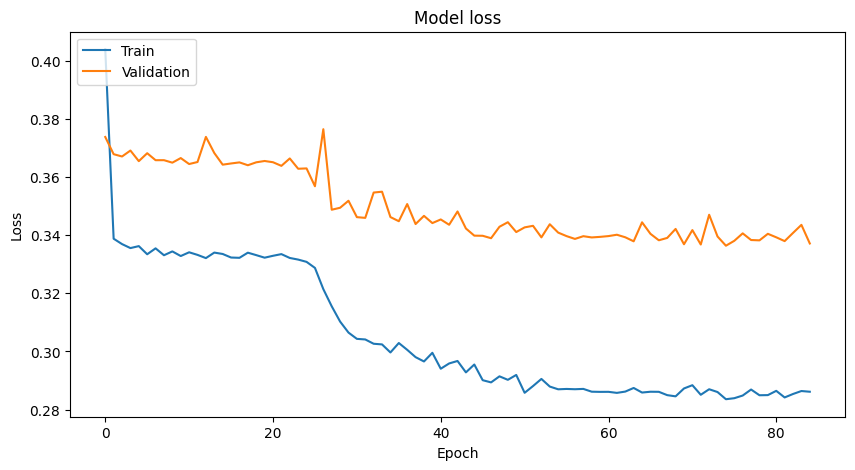

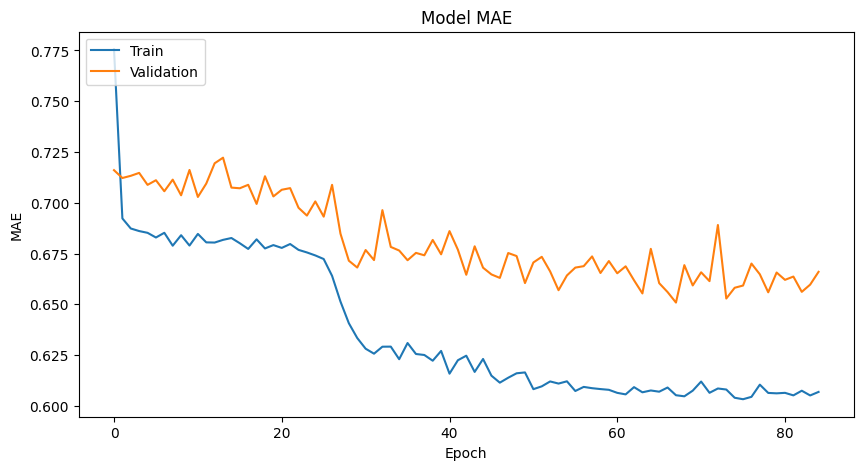

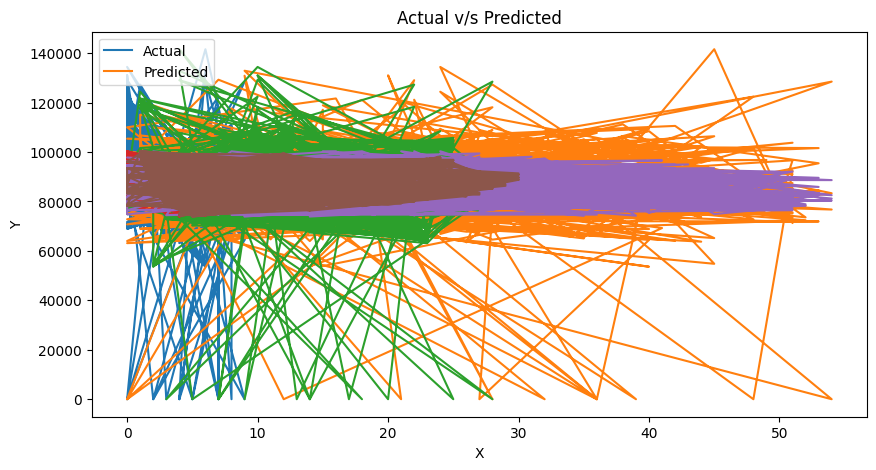

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

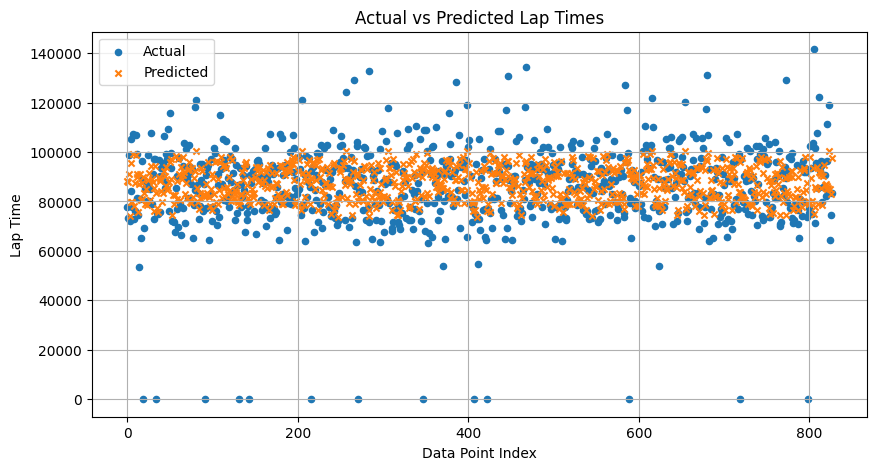

In [ ]:
import matplotlib.pyplot as plt

# Create an index for the x-axis
index = range(len(y_test))

# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(index, y_test, label='Actual', marker='o', s=20)  # Adjust marker and size as needed
plt.scatter(index, y_pred, label='Predicted', marker='x', s=20) # Adjust marker and size as needed
plt.title('Actual vs Predicted Lap Times')
plt.ylabel('Lap Time')
plt.xlabel('Data Point Index')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


<ipython-input-71-aeb48593aa98>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_circuit_data['Year'] = label_encoders['Year'].inverse_transform(driver_circuit_data['Year'])


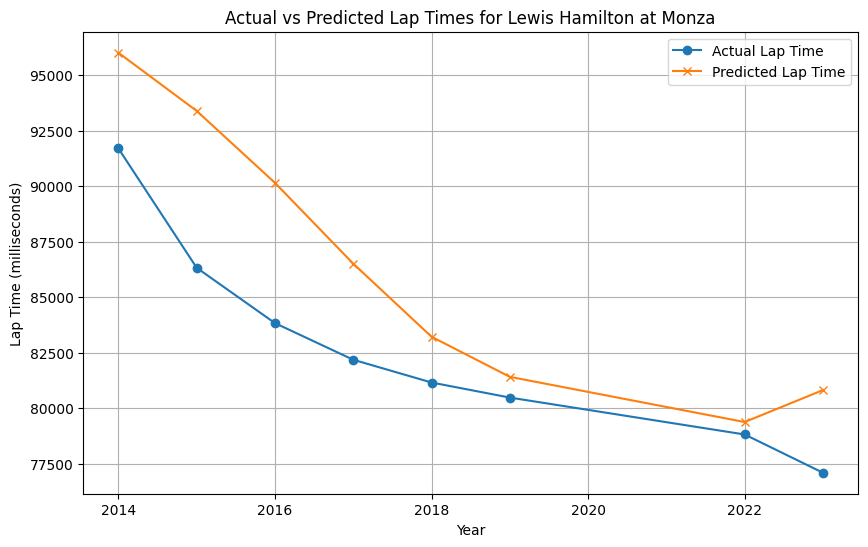

In [ ]:
import matplotlib.pyplot as plt

# Example: Plot for Lewis Hamilton at Monza
driver_name = 'Lewis Hamilton'
circuit_name = 'Monza'

# Filter data for the specified driver and circuit
driver_circuit_data = cleaned_df[(cleaned_df['DriverID'] == 0) & (cleaned_df['CircuitID'] == 0)]

if not driver_circuit_data.empty:
    X_pred = driver_circuit_data[['Year', 'DriverID', 'CircuitID']].values
    actual_lap_times = driver_circuit_data['LapTime'].values

    # Scale input features using the same scaler used during training
    X_pred_scaled = scaler_X.transform(X_pred) # Scale using all 3 features

    # Predict lap times using the trained model
    predicted_lap_times_scaled = model.predict(X_pred_scaled)

    # Inverse transform to get actual lap times
    predicted_lap_times = scaler_y.inverse_transform(predicted_lap_times_scaled)

    # # Inverse transform the years back to original values - not required since we use X_pred
    driver_circuit_data['Year'] = label_encoders['Year'].inverse_transform(driver_circuit_data['Year'])

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(driver_circuit_data['Year'], actual_lap_times, label='Actual Lap Time', marker='o') # Use original year values
    plt.plot(driver_circuit_data['Year'], predicted_lap_times, label='Predicted Lap Time', marker='x') # Use original year values
    plt.xlabel('Year')
    plt.ylabel('Lap Time (milliseconds)')
    plt.title(f'Actual vs Predicted Lap Times for {driver_name} at {circuit_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for {driver_name} at {circuit_name}")